# 简介

* 网格的数据结构
* 网格类型

## IntervalMesh

## TirangleMesh

## 三角形网格的数据结构

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from fealpy.mesh.TriangleMesh import TriangleMesh
%matplotlib inline

网格是有限元算法的基础, 最少需要两个二维数组来存储网格的信息:

* 网格节点坐标数组 `node`:
    + $N\times 2$ 的二维数组
    + `node[i, 0]` 和 `node[i, 1]` 分别存储第 $i$ 个网格节点的 $x$ 和 $y$ 坐标
* 单元顶点编号数组 `cell`:
    + $NC\times 3$ 的二维数组
    + `cell[i, 0]`, `cell[i, 1]` 和 `cell[i, 2]` 分别存储第 $i$ 个单元三个顶点的全局编号(即 `node` 中的行号)

In [2]:
import numpy as np
node = np.array(
    [(0.0, 0.0),
     (1.0, 0.0),
     (1.0, 1.0),
     (0.0, 1.0)], dtype=np.float)
cell = np.array([
        (1, 2, 0), 
        (3, 0, 2)], dtype=np.int)

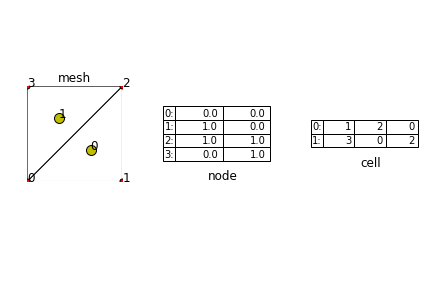

In [3]:
from fealpy.mesh.TriangleMesh import TriangleMesh
import matplotlib.pyplot as plt 
%matplotlib inline
tmesh = TriangleMesh(node, cell)
fig, axes = plt.subplots(1, 3)
tmesh.add_plot(axes[0], cellcolor='w')
tmesh.find_node(axes[0], showindex=True, markersize=25, fontsize=12)
tmesh.find_cell(axes[0], showindex=True, markersize=100, fontsize=12)
axes[0].set_title('mesh')

for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[1].table(cellText=node, rowLabels=['0:', '1:', '2:', '3:'], loc='center')
axes[1].set_title('node', y=0.3)
axes[2].table(cellText=cell, rowLabels=['0:', '1:'], loc='center')
axes[2].set_title('cell', y=0.35)
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.show()

除了上述两个基本数组之外, 有限元方法中还需要更多的网格数据, 如:

* 边数组 `edge`
    + 二维 $NE\times 2$ 数组 
    + `edge[i, 0]` 和 `edge[i, 1]` 分别存储第 $i$ 条边的起点和终点的全局编号(即对应 `point` 数组中的行号)
    + 如果第 $i$ 条边是边界边, 则规定从 `edge[i, 0]` 看向 `edge[i, 1]`, 网格离散区域一定在左手边
* 边与单元的相邻关系数组 `edge2cell`
    + 二维 $NE \times 4 $ 的数组
    + `edge2cell[i, 0]` 和 `edge2cell[i, 1]` 分别存储第 $i$ 条边左右两个单元的全局编号(即对应 `cell` 数组中的行号)
    + `edge2cell[i, 2]` 和 `edge2cell[i, 3]` 分别存储第 $i$ 条边在左右两个单元中的局部编号
    + 如果是边界边, 则
        - `edge2cell[i, 0] = edge2cell[i, 1]` 
        - `edge2cell[i, 2] = edge2cell[i, 3]`
        
**注: `edge` 和 `edge2cell` 可以从 `cell` 中构造出来.**

In [13]:
import numpy as np
from fealpy.mesh.mesh_tools import unique_row

node =np.array(
    [(0.0, 0.0),
     (1.0, 0.0),
     (1.0, 1.0),
     (0.0, 1.0)], dtype=np.float)

cell = np.array([
        (1, 2, 0), 
        (3, 0, 2)], dtype=np.int)
localEdge = np.array(
    [(1, 2),
     (2, 0),
     (0, 1)], dtype=np.int)

totalEdge = cell[:, localEdge]
totalEdge = totalEdge.reshape(-1, 2)
stotalEdge = np.sort(totalEdge, axis=1)
print('stotalEdge',stotalEdge)
uedge, i0, j = unique_row(stotalEdge)
NE = i0.shape[0]
print('i0',i0)
print('j',j)
i1 = np.zeros(NE, dtype=np.int) 
NC = cell.shape[0]
i1[j] = np.arange(3*NC)
print('1',np.arange(3*NC))
print('i1',i1)
edge2cell = np.zeros((NE, 4), dtype=np.int)
t0 = i0//3
t1 = i1//3
k0 = i0%3
k1 = i1%3
edge2cell[:, 0] = t0
edge2cell[:, 1] = t1
edge2cell[:, 2] = k0
edge2cell[:, 3] = k1

edge = totalEdge[i0]
print(edge)
print(edge2cell)


stotalEdge [[0 2]
 [0 1]
 [1 2]
 [0 2]
 [2 3]
 [0 3]]
i0 [1 0 5 2 4]
j [1 0 3 1 4 2]
1 [0 1 2 3 4 5]
i1 [1 3 5 2 4]
[[0 1]
 [2 0]
 [3 0]
 [1 2]
 [2 3]]
[[0 0 1 1]
 [0 1 0 0]
 [1 1 2 2]
 [0 0 2 2]
 [1 1 1 1]]


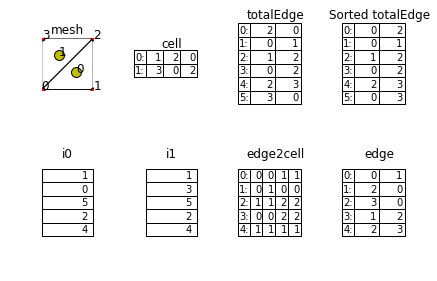

In [5]:
from fealpy.mesh.TriangleMesh import TriangleMesh
import matplotlib.pyplot as plt 
%matplotlib inline
tmesh = TriangleMesh(node, cell)
fig, axes = plt.subplots(2, 4)
tmesh.add_plot(axes[0, 0], cellcolor='w')
tmesh.find_node(axes[0, 0], showindex=True, markersize=25, fontsize=12)
tmesh.find_cell(axes[0, 0], showindex=True, markersize=100, fontsize=12)
axes[0, 0].set_title('mesh')

for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[0, 1].table(cellText=cell, rowLabels=['0:', '1:'], loc='center')
axes[0, 1].set_title('cell', y=0.6)
axes[0, 2].table(cellText=totalEdge, rowLabels=['0:', '1:', '2:', '3:', '4:', '5:'], loc='center')
axes[0, 2].set_title('totalEdge', y=0.85)
axes[0, 3].table(cellText=np.sort(totalEdge, axis=1), rowLabels=['0:', '1:', '2:', '3:', '4:', '5:'], loc='center')
axes[0, 3].set_title('Sorted totalEdge', y=0.85)
axes[1, 0].table(cellText=i0.reshape(-1,1),  loc='center')
axes[1, 0].set_title('i0', y=0.85)
axes[1, 1].table(cellText=i1.reshape(-1,1),  loc='center')
axes[1, 1].set_title('i1', y=0.85)
axes[1, 2].table(cellText=edge2cell,  rowLabels=['0:', '1:', '2:', '3:', '4:'], loc='center')
axes[1, 2].set_title('edge2cell', y=0.85)
axes[1, 3].table(cellText=edge,  rowLabels=['0:', '1:', '2:', '3:', '4:'], loc='center')
axes[1, 3].set_title('edge', y=0.85)
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.show()

### 下面给出网格的数据结构示意图：

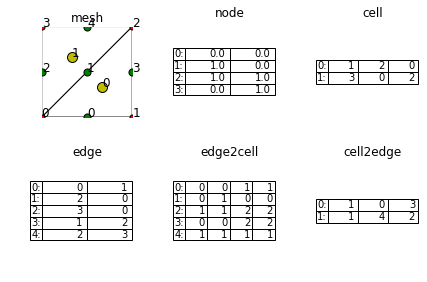

In [86]:
from fealpy.mesh.TriangleMesh import TriangleMesh
import matplotlib.pyplot as plt 
%matplotlib inline
node = np.array(
    [(0.0, 0.0),
     (1.0, 0.0),
     (1.0, 1.0),
     (0.0, 1.0)], dtype=np.float)
cell = np.array([
        (1, 2, 0), 
        (3, 0, 2)], dtype=np.int)
tmesh = TriangleMesh(node, cell) # 三角形网格实例
fig, axes = plt.subplots(2, 3)
tmesh.add_plot(axes[0, 0], cellcolor='w')
tmesh.find_node(axes[0, 0], showindex=True, markersize=25, fontsize=12)
tmesh.find_edge(axes[0, 0], showindex=True, markersize=50, fontsize=12)
tmesh.find_cell(axes[0, 0], showindex=True, markersize=100, fontsize=12)
axes[0, 0].set_title('mesh')

for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[0, 1].table(cellText=node, rowLabels=['0:', '1:', '2:', '3:'], loc='center')
axes[0, 1].set_title('node')
axes[0, 2].table(cellText=cell, rowLabels=['0:', '1:'], loc='center')
axes[0, 2].set_title('cell')
axes[1, 0].table(cellText=tmesh.ds.edge, rowLabels=['0:', '1:', '2:', '3:', '4:'],  loc='center')
axes[1, 0].set_title('edge')
axes[1, 1].table(cellText=tmesh.ds.edge2cell, rowLabels=['0:', '1:', '2:', '3:', '4:'],  loc='center')
axes[1, 1].set_title('edge2cell')
axes[1, 2].table(cellText=tmesh.ds.cell_to_edge(), rowLabels=['0:', '1:'],  loc='center')
axes[1, 2].set_title('cell2edge')
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.show()

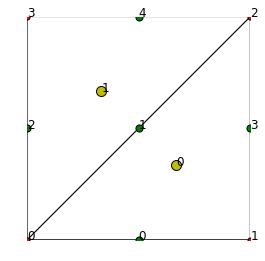

In [41]:
tmesh = TriangleMesh(node, cell)
tmesh.uniform_refine(0)
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
tmesh.add_plot(axes, cellcolor='w')
tmesh.find_node(axes, showindex=True, markersize=25, fontsize=12)
tmesh.find_edge(axes, showindex=True, markersize=50, fontsize=12)
tmesh.find_cell(axes, showindex=True, markersize=100, fontsize=12)
plt.show()

* 单元所对应的网格点的对应关系

In [42]:
print(tmesh.ds.cell_to_node())

  (0, 0)	True
  (0, 1)	True
  (0, 2)	True
  (1, 0)	True
  (1, 2)	True
  (1, 3)	True


* 单元所对应的三条边的对应关系

In [43]:
print(tmesh.ds.cell_to_edge())

[[1 0 3]
 [1 4 2]]


* 单元三条边所对应的邻居单元

* 单元所对应的邻居单元的全局编号

In [44]:
print(tmesh.ds.cell_to_cell())

[[1 0 0]
 [0 1 1]]


In [45]:
print(tmesh.ds.edge_to_edge())

ValueError: operands could not be broadcast together with shapes (5,2) (2,5) 

* 网格节点与它相邻边的全局编号的对应关系

In [46]:
print(tmesh.ds.node_to_edge())

  (0, 0)	True
  (0, 1)	True
  (0, 2)	True
  (1, 0)	True
  (1, 3)	True
  (2, 1)	True
  (2, 3)	True
  (2, 4)	True
  (3, 2)	True
  (3, 4)	True


* 网格节点的邻居节点

In [47]:
print(tmesh.ds.node_to_node())

  (0, 1)	True
  (0, 2)	True
  (0, 3)	True
  (1, 0)	True
  (1, 2)	True
  (2, 0)	True
  (2, 1)	True
  (2, 3)	True
  (3, 0)	True
  (3, 2)	True


* 单元节点对应的单元编号

In [48]:
print(tmesh.ds.node_to_cell())

  (0, 0)	True
  (0, 1)	True
  (1, 0)	True
  (2, 0)	True
  (2, 1)	True
  (3, 1)	True


### 其它三角形网格的生成

方形区域的一致的三角形网格

In [87]:
from fealpy.mesh.simple_mesh_generator import squaremesh
mesh = squaremesh(0, 1, 0, 1, r=4)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'dtype'

In [ ]:
from fealpy.mesh.simple_mesh_generator import rectangledomainmesh
box = [-1, 1, -1, 1]
mesh = rectangledomainmesh(box, nx=10, ny=10, meshtype='tri')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

In [ ]:
from fealpy.mesh.simple_mesh_generator import unitcircledomainmesh
mesh = unitcircledomainmesh(0.1, meshtype='tri')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

In [ ]:
from fealpy.mesh.simple_mesh_generator import triangle
mesh = triangle([0,1,0,1], 0.125, meshtype='tri')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

In [ ]:
from fealpy.mesh.simple_mesh_generator import fishbone
mesh = fishbone([0,1,0,1], 10)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

In [ ]:
from fealpy.mesh.simple_mesh_generator import cross_mesh
mesh = cross_mesh([0,1,0,1], 10)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

In [ ]:
from fealpy.mesh.simple_mesh_generator import rice_mesh
mesh = rice_mesh([0,1,0,1], 10)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

In [ ]:
from fealpy.mesh.simple_mesh_generator import nonuniform_mesh
mesh = nonuniform_mesh([0,1,0,1], 6)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

In [ ]:
from fealpy.mesh.simple_mesh_generator import uncross_mesh
mesh = uncross_mesh(box, n=10, r="1")
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()